In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [28]:
#Constants
G = 6.67430*10**(-11)

In [29]:
# Planet initial locations and velocities
pos_planet1 = [0,0,0]
vel_planet1 = [0,0,0]
acc_planet1 = [0,0,0]
mass_planet1 = 5.9*10**22.5

pos_planet2 = [2*10**8,0,0]
vel_planet2 = [0,0,0]
acc_planet2 = [0,0,0]
mass_planet2 = 7.3*10**22

In [30]:
def calc_gravF(m1,m2,pos1,pos2):
    x_dist = pos2[0] - pos1[0]
    y_dist = pos2[1] - pos1[1]
    z_dist = pos2[2] - pos1[2]
    r = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    return [G * m1 * m2 / (r ** 2), r]

In [31]:
# For loop to simulate frames
simulation_length = 10**6 # Each frame represents 1 second
information_dict = {}

der_names = ["pos","vel","acc"]
for i in range(2):
    name = "p" + str(i + 1)
    information_dict[name] = {}

    for j in range(3):
        information_dict[name][der_names[j]] = []

print(f'Days:{simulation_length/60/60/24}')

Days:11.574074074074074


In [32]:
for frame in range(simulation_length):

    pos_planet1 = [x + y for x, y in zip(pos_planet1, vel_planet1)]
    pos_planet2 = [x + y for x, y in zip(pos_planet2, vel_planet2)]

    vel_planet1 = [x + y for x, y in zip(vel_planet1, acc_planet1)]
    vel_planet2 = [x + y for x, y in zip(vel_planet2, acc_planet2)]

    acc_planet1 = [0,0,0]
    acc_planet2 = [0,0,0]

    x_dist = pos_planet2[0]-pos_planet1[0]
    y_dist = pos_planet2[1]-pos_planet1[1]
    z_dist = pos_planet2[2]-pos_planet1[2]

    dist = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    force_mag = G*mass_planet1*mass_planet2/(dist**2)
    force_vector = [0,0,0]
    
    force_vector[0] = force_mag/dist*(x_dist)
    force_vector[1] = force_mag/dist*(y_dist)
    force_vector[2] = force_mag/dist*(z_dist)
    
    for i in range(3):
        acc_planet1[i] = force_vector[i]/mass_planet1
        acc_planet2[i] = -force_vector[i]/mass_planet2

    information_dict["p1"]["pos"].append(pos_planet1)
    information_dict["p1"]["vel"].append(vel_planet1)
    information_dict["p1"]["acc"].append(acc_planet1)
    information_dict["p2"]["pos"].append(pos_planet2)
    information_dict["p2"]["vel"].append(vel_planet2)
    information_dict["p2"]["acc"].append(acc_planet2)

    if frame % 10**5 == 0:
        print(frame)

    
#157349

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


In [33]:
x1_acc = []
x2_acc = []
for i in range(simulation_length):
    x1_acc.append(information_dict['p1']['pos'][i][0])
    x2_acc.append(information_dict['p2']['pos'][i][0])


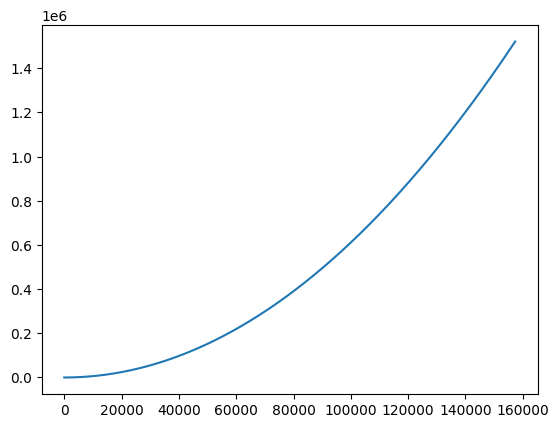

In [34]:
plt.plot(range(157349), x1_acc[0:157349])

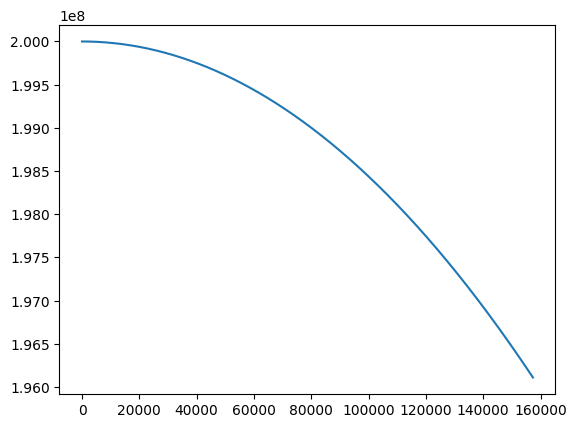

In [35]:
plt.plot(range(157349), x2_acc[0:157349])

In [36]:
for i in range(simulation_length):
    if information_dict['p1']['pos'][i][0] > information_dict['p2']['pos'][i][0]:
        print(i)
        print(information_dict['p1']['pos'][i][0], information_dict['p2']['pos'][i][0])
        print(information_dict['p1']['pos'][i-1][0], information_dict['p2']['pos'][i-1][0])
        position_of_crossover = (information_dict['p2']['pos'][i-1][0] + information_dict['p1']['pos'][i-1][0])/2
        print(position_of_crossover)
        raise IndentationError


754778
56257075.04794578 56217410.85778535
56244617.899664916 56249249.004927285
56246933.4522961


IndentationError: None (<string>)